# Multivariate GPR

See https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_prior_posterior.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-prior-posterior-py

See also https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, RationalQuadratic

## function in two variables

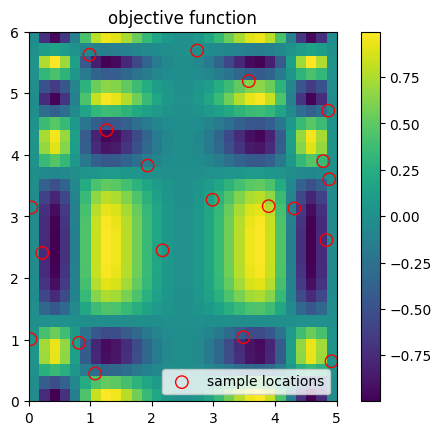

In [34]:
rng = np.random.RandomState(4)

xmax = 5
ymax = 6
xmin = 0
ymin = 0
X_train = rng.uniform(xmin, xmax, 20) #.reshape(-1, 1)
Y_train = rng.uniform(ymin, ymax, 20) #.reshape(-1, 1)

def f_objective(x,y):
    """
    the objective function at x and y
    """
    return np.sin((x - 2.5) ** 2)*np.cos((y - 2.5) ** 2)

x_hi_res = np.linspace(xmin,xmax,30)
y_hi_res = np.linspace(ymin,ymax,30)
XX,YY = np.meshgrid(x_hi_res,y_hi_res)
ZZ = f_objective(XX,YY)

fig,ax = plt.subplots()
cax= ax.imshow(ZZ,origin='lower',extent=[xmin,xmax,ymin,ymax])
ax.scatter(X_train, Y_train, s=80, facecolors='none', edgecolors='r', label='sample locations')
ax.set_title("objective function")
ax.legend()
fig.colorbar(cax)

C:\Users\prest\.virtualenvs\gmaps-vis-VthAHKuJ\lib\site-packages\sklearn\gaussian_process\_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


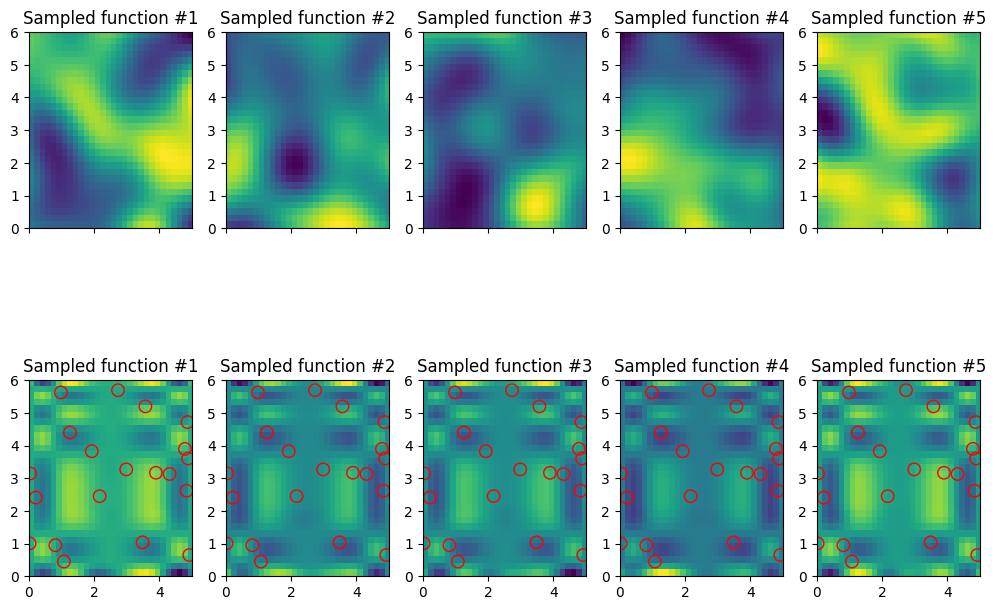

In [19]:
n_samples = 5 # how many functions to draw from the distribution of candidate functions 

kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
gpr_model = gpr

fig, axes = plt.subplots(nrows=2, ncols=n_samples, sharex=True, figsize=(10, 8))

# plot prior dist. samples
pts = np.array([XX,YY]).reshape(2,-1).transpose()
z_mean, z_std = gpr_model.predict(pts, return_std=True)
z_samples = gpr_model.sample_y(pts, n_samples)

for idx, single_prior in enumerate(z_samples.T):
    ax = axes[0,idx]
    cax= ax.imshow(single_prior.reshape(XX.shape),origin='lower',extent=[xmin,xmax,ymin,ymax])
    ax.set_title(f"Sampled function #{idx + 1}")

z_mean, z_std = gpr_model.predict(pts, return_std=True)
z_samples = gpr_model.sample_y(pts, n_samples)

# get posterior distribution
XX_train, YY_train = np.meshgrid(X_train, Y_train)
pts_train = np.array([XX_train,YY_train]).reshape(2,-1).transpose()
ZZ_train = f_objective(XX_train,YY_train)

gpr.fit(pts_train, ZZ_train.flatten())

# plot posterior dist. samples

z_mean, z_std = gpr_model.predict(pts, return_std=True)
z_samples = gpr_model.sample_y(pts, n_samples)

for idx, single_prior in enumerate(z_samples.T):
    ax = axes[1,idx]
    cax= ax.imshow(single_prior.reshape(XX.shape),origin='lower',extent=[xmin,xmax,ymin,ymax])
    ax.scatter(X_train, Y_train, s=80, facecolors='none', edgecolors='r', label='sample locations')
    ax.set_title(f"Sampled function #{idx + 1}")

fig.tight_layout()
# # plot posterior
# gpr.fit(np.array([X_train,Y_train]).transpose(), z_train)

# # fig.suptitle("Radial Basis Function kernel", fontsize=18)
# plt.tight_layout()

## Todo: 
- [ ] generalize the function calls to accept multivariate data in more than two variables

In [24]:
training_pts.shape

(2, 20)

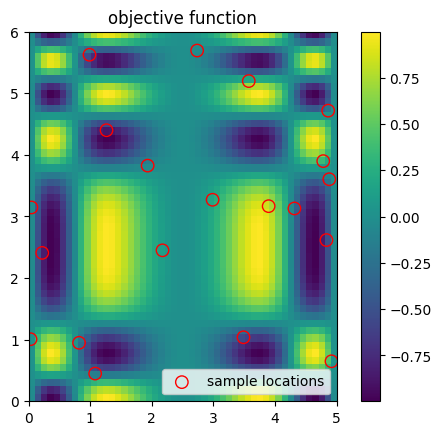

In [59]:
rng = np.random.RandomState(4)

n_vars = 2
bounds = np.array([[0,0],[5,6]])
n_train_pts = 20
n_hi_res_pts = 50

# todo generalize
def f_objective(x,y):
    """
    the objective function at x and y
    """
    return np.sin((x - 2.5) ** 2)*np.cos((y - 2.5) ** 2)

# random points for training drawn in the domain specified by bounds
training_pts = np.zeros((n_vars,n_train_pts))
for i in range(n_vars):
    training_pts[i,:] = rng.uniform(bounds[0,i],bounds[1,i],n_train_pts)

# points for high res sampling, helpful e.g. if we want to find extremum in the function from the posterior distribution
hi_res_pts = np.zeros((n_vars,n_hi_res_pts))
for i in range(n_vars):
    hi_res_pts[i,:] = np.linspace(bounds[0,i],bounds[1,i],n_hi_res_pts)

hi_res_meshgrid = np.meshgrid(hi_res_pts[0],hi_res_pts[1])
ZZ = f_objective(hi_res_meshgrid[0], hi_res_meshgrid[1])

fig,ax = plt.subplots()
cax= ax.imshow(ZZ,origin='lower',extent=[bounds[0,0],bounds[1,0],bounds[0,1],bounds[1,1]])
ax.scatter(training_pts[0], training_pts[1], s=80, facecolors='none', edgecolors='r', label='sample locations')
ax.set_title("objective function")
ax.legend()
fig.colorbar(cax)

C:\Users\prest\.virtualenvs\gmaps-vis-VthAHKuJ\lib\site-packages\sklearn\gaussian_process\_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


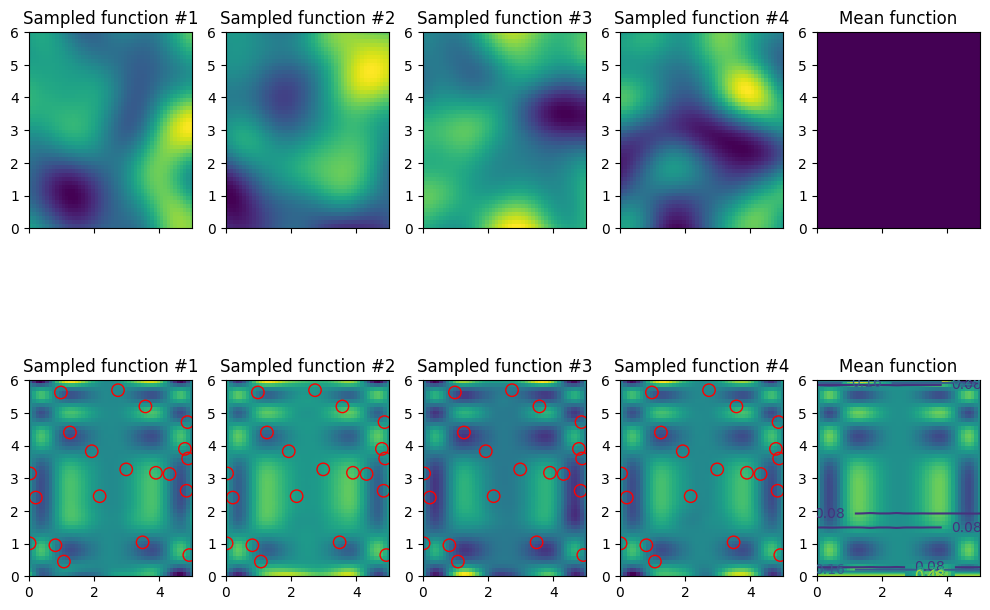

In [61]:
n_samples = 4 # how many functions to draw from the distribution of candidate functions 

kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
gpr_model = gpr

fig, axes = plt.subplots(nrows=2, ncols=n_samples+1, sharex=True, figsize=(10, 8))

# plot prior dist. samples
hi_res_pts = np.array(hi_res_meshgrid).reshape(n_vars,-1).transpose()
z_mean, z_std = gpr_model.predict(hi_res_pts, return_std=True)
z_samples = gpr_model.sample_y(hi_res_pts, n_samples)

for idx, single_prior in enumerate(z_samples.T):
    ax = axes[0,idx]
    cax= ax.imshow(single_prior.reshape(hi_res_meshgrid[0].shape),origin='lower',extent=[bounds[0,0],bounds[1,0],bounds[0,1],bounds[1,1]])
    ax.set_title(f"Sampled function #{idx + 1}")

axes[0s,-1].imshow(z_mean.reshape(hi_res_meshgrid[0].shape),origin='lower',extent=[bounds[0,0],bounds[1,0],bounds[0,1],bounds[1,1]])
axes[0,-1].set_title(f"Mean function")

# get posterior distribution
train_meshgrid = np.meshgrid(training_pts[0], training_pts[1])
pts_train = np.array(train_meshgrid).reshape(2,-1).transpose()
ZZ_train = f_objective(*train_meshgrid)

gpr.fit(pts_train, ZZ_train.flatten())

# plot posterior dist. samples
z_mean, z_std = gpr_model.predict(hi_res_pts, return_std=True)
z_samples = gpr_model.sample_y(hi_res_pts, n_samples)

for idx, single_prior in enumerate(z_samples.T):
    ax = axes[1,idx]
    cax= ax.imshow(single_prior.reshape(hi_res_meshgrid[0].shape),origin='lower',extent=[xmin,xmax,ymin,ymax])
    ax.scatter(training_pts[0], training_pts[1], s=80, facecolors='none', edgecolors='r', label='sample locations')
    ax.set_title(f"Sampled function #{idx + 1}")

ax = axes[1,-1]
ax.imshow(z_mean.reshape(hi_res_meshgrid[0].shape),origin='lower',extent=[bounds[0,0],bounds[1,0],bounds[0,1],bounds[1,1]])
ax.set_title(f"Mean function")

# show uncertainty as contours -- not working. 
CS = ax.contour(hi_res_meshgrid[0], hi_res_meshgrid[1], z_std.reshape(hi_res_meshgrid[0].shape))
ax.clabel(CS, fontsize=10)

fig.tight_layout()